In [2]:
import pandas as pd 
import geopandas as gpd 
from shapely.geometry import Point, Polygon
from datetime import datetime

gw_df = pd.read_csv("../../notebooks-and-markdowns/gw_final_df.csv")

In [3]:
gw_df = gw_df[gw_df['SoilMoi0_10cm_inst'].notnull()]
gw_df['time']=[datetime.strptime(str(t)[0:7], '%Y-%m') for t in gw_df["time"]]

In [4]:
gw_df
#df_subset = gw_df[gw_df['time']=='2008-07-01']
df_subset = gw_df

In [5]:
#df_subset.plot(x=df_subset.lon, y=df_subset.lat)
geometry = [Point(xy) for xy in zip(df_subset['lon'], df_subset['lat'])]
geometry[:3]

geo_df = gpd.GeoDataFrame(df_subset, #specify our data
                          crs='epsg:4326', #specify our coordinate reference system
                          geometry=geometry) #specify the geometry list we created
geo_df.head()

,time,lon,lat,lwe_thickness,SWE_inst,SoilMoi0_10cm_inst,SoilMoi10_40cm_inst,SoilMoi40_100cm_inst,SoilMoi100_200cm_inst,d_SWE_inst,d_SoilMoi0_10cm_inst,gw_estimate,geometry
0,2002-04-01,-107.875,36.125,1.351319,0.000125,16.043537,58.864773,123.72265,215.24927,-2.977210,-1.751896,0.608043,POINT (-107.87500 36.12500)
1,2002-04-01,-107.875,36.375,1.351319,0.000417,15.686712,55.378174,114.68325,205.29121,-2.976918,-2.108721,0.643696,POINT (-107.87500 36.37500)
2,2002-04-01,-107.625,36.125,1.351319,0.000792,13.752791,59.226530,119.29755,219.59993,-2.976543,-4.042642,0.837050,POINT (-107.62500 36.12500)
3,2002-04-01,-107.625,36.375,1.351319,0.000958,15.809375,57.523930,118.31177,211.63809,-2.976376,-1.986058,0.631375,POINT (-107.62500 36.37500)
4,2002-04-01,-107.875,36.625,1.351319,0.000500,12.120471,43.628730,79.70053,165.92589,-2.976835,-5.674962,1.000312,POINT (-107.87500 36.62500)


In [6]:
import numpy as np

geo_df['gw_estimate'].describe()
np.percentile(geo_df['gw_estimate'], 25)

-0.8322536399319571

In [22]:
more_low = geo_df[gw_df['gw_estimate'] < -.833]
more_low



,time,lon,lat,lwe_thickness,SWE_inst,SoilMoi0_10cm_inst,SoilMoi10_40cm_inst,SoilMoi40_100cm_inst,SoilMoi100_200cm_inst,d_SWE_inst,d_SoilMoi0_10cm_inst,gw_estimate,geometry
106,2002-04-01,-106.625,39.125,10.880361,9.874958,30.916275,44.996890,75.237270,167.79200,6.897623,13.120842,-0.913810,POINT (-106.62500 39.12500)
114,2002-04-01,-107.125,41.125,0.937055,4.629792,27.523129,55.576730,38.876556,95.77502,1.652457,9.727695,-1.044310,POINT (-107.12500 41.12500)
128,2002-04-01,-107.375,38.125,10.880361,6.253625,35.189964,45.658520,77.214390,126.69172,3.276290,17.394531,-0.979046,POINT (-107.37500 38.12500)
138,2002-04-01,-107.125,39.125,10.880361,6.719500,35.825085,42.898230,47.939716,136.10934,3.742165,18.029652,-1.089146,POINT (-107.12500 39.12500)
141,2002-04-01,-107.375,39.875,10.880361,14.289500,34.068428,58.289703,51.741520,155.66394,11.312165,16.272995,-1.670480,POINT (-107.37500 39.87500)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
253159,2023-03-01,-117.125,33.375,-15.985284,0.000000,23.099936,69.720520,124.859856,167.87517,-2.977335,5.304502,-1.831245,POINT (-117.12500 33.37500)
253160,2023-03-01,-117.375,33.625,-15.985284,0.000000,23.771778,71.878510,131.392520,159.80002,-2.977335,5.976345,-1.898429,POINT (-117.37500 33.62500)
253161,2023-03-01,-117.375,33.875,-15.985284,0.000000,25.892786,78.647880,153.142800,238.62262,-2.977335,8.097353,-2.110530,POINT (-117.37500 33.87500)
253162,2023-03-01,-117.125,33.625,-15.985284,0.000000,24.670370,74.946200,142.597180,211.69531,-2.977335,6.874937,-1.988289,POINT (-117.12500 33.62500)


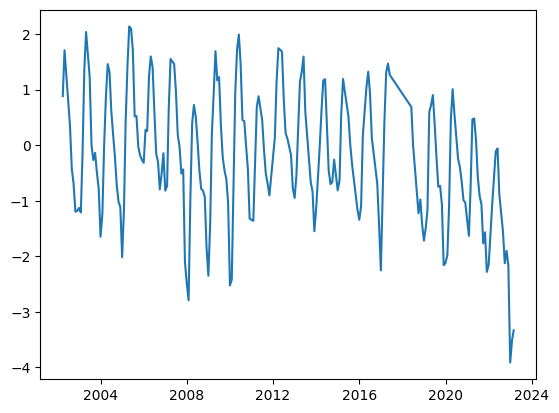

In [23]:
## what time period had the lowest groundwater anamoly average ? 
low = gw_df[gw_df['gw_estimate']==min(gw_df['gw_estimate'])]
low




gw_crb = gw_df[['time','gw_estimate']]
gw_crb = gw_crb.groupby(['time']).mean().reset_index()
gw_crb

plt.plot('time', 'gw_estimate', data=gw_crb)
plt.show()



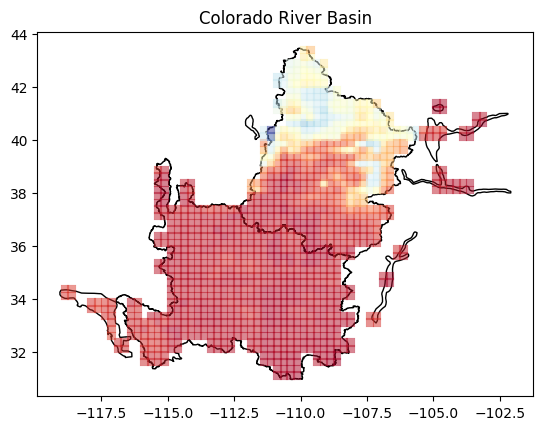

In [24]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

shpfl_crb = gpd.read_file("/home/kmk58/remoteData/shapefiles/Colorado_River_Basin_Hydrological_Boundaries_with_Areas_served_by_Colorado_River.shp")
#ax = shpfl.plot()

crb_23 = geo_df[geo_df['time']=="2023-03-01"]

# plot of entire Colorado River Basin
plt.style.use('default')
#plt.figure(figsize=[10,10])
#basemap = 

shpfl_crb.plot(facecolor='none', edgecolor='black')
#ax.set_axis_off()
plt.title("Colorado River Basin")
#plt.grid(which="minor")
#plt.minorticks_on()
#plt.show()
plt.scatter(crb_23["lon"],crb_23["lat"], marker='s', c=crb_23.gw_estimate, cmap='RdYlBu_r', alpha=.5, linewidth=.1, label=crb_23.gw_estimate)
#sp = geo_df.plot(marker='o', facecolor='none',color='red', markersize=1)

#sp.plot(basemap,color='red', markersize=1)
#sp.plot()

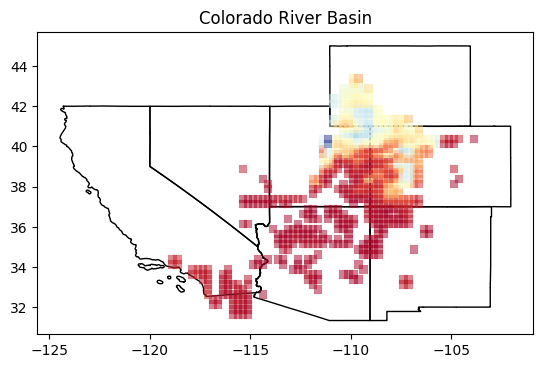

In [25]:
# plot of entire Colorado River Basin
plt.style.use('default')
#plt.figure(figsize=[10,10])
#basemap = 
shpfl = gpd.read_file("/home/kmk58/remoteData/shapefiles/Colorado_River_Basin_US_States.shx")
more_low_23 = more_low[more_low['time']=="2023-03-01"]

shpfl.plot(facecolor='none', edgecolor='black')
#ax.set_axis_off()
plt.title("Colorado River Basin")
#plt.grid(which="minor")
#plt.minorticks_on()
#plt.show()
plt.scatter(more_low_23["lon"],more_low_23["lat"], marker='s', c=more_low_23.gw_estimate, cmap='RdYlBu_r', alpha=.5, linewidth=.1, label=more_low_23.gw_estimate)
#sp = geo_df.plot(marker='o', facecolor='none',color='red', markersize=1)

<Axes: >

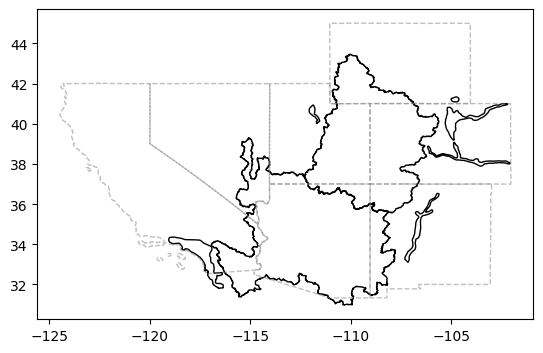

In [32]:
ax1=shpfl_crb.plot(facecolor='none', edgecolor='black')
shpfl.plot(ax=ax1, facecolor='none', edgecolor='grey',linestyle='dashed',alpha=.5)


/usr/local/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3448: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


'\n#shpfl_az.plot(facecolor=\'none\', edgecolor=\'black\', lw=2).set_axis_off()\nplt.title("State of Arizona")\nplt.scatter(test["lon"],test["lat"], marker=\'s\', s=90, c=test.gw_estimate, cmap=\'RdYlBu_r\', alpha=.3, linewidth=1, label=test.gw_estimate)\nplt.xlim([-120,-100])\nplt.ylim([30,45])\n'

<Figure size 1500x1500 with 0 Axes>

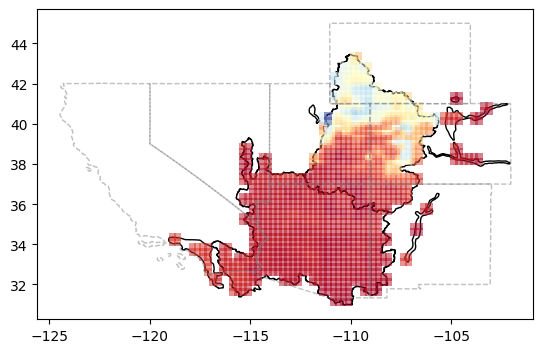

In [80]:
shpfl_az = gpd.read_file("/home/kmk58/data/tl_rd22_04_cd118.shp")

# plot of entire Colorado River Basin
#plt.style.use('default')
#plt.figure(figsize=[10,10])
#shpfl.plot(facecolor='none', edgecolor='black')
#plt.grid(which="minor")
#plt.minorticks_on()
#plt.show()

geo_df = geo_df.to_crs(shpfl_az.crs)
test = gpd.sjoin(shpfl_az, geo_df, how='inner', op='intersects')
test = test[test['time']=='2023-03-01']
#grace_shp_df = df_subset[df_subset.intersects(shpfl_az['geometry'])]
geo_df23 = geo_df[geo_df['time']=='2023-03-01']

plt.style.use('default')
plt.figure(figsize=[15,15])
ax1=shpfl_crb.plot(facecolor='none', edgecolor='black')
ax2=geo_df23.plot(ax=ax1,marker='s',markersize=30, alpha=.5, column=geo_df23.gw_estimate, cmap='RdYlBu_r', linewidth=1,edgecolor='none')
shpfl.plot(ax=ax2, facecolor='none', edgecolor='grey',linestyle='dashed',alpha=.5)

#plt.xlim([-122,-100])
#plt.ylim([30.5,44])


"""
#shpfl_az.plot(facecolor='none', edgecolor='black', lw=2).set_axis_off()
plt.title("State of Arizona")
plt.scatter(test["lon"],test["lat"], marker='s', s=90, c=test.gw_estimate, cmap='RdYlBu_r', alpha=.3, linewidth=1, label=test.gw_estimate)
plt.xlim([-120,-100])
plt.ylim([30,45])
"""


In [81]:
pip install pysal

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 22.8 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.6/116.6 kB 95.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 61.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 kB 60.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.5/147.5 kB 126.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 52.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 42.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 171.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.2/220.2 kB 160.